# K-means Clustering 실습

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('data/dots.csv')
df

,x,y
0,1,1
1,1,0
2,2,1
3,5,3
4,6,7
5,6,6
6,8,0
7,11,2
8,12,1
9,2,2


Text(42.25000000000001, 0.5, 'y')

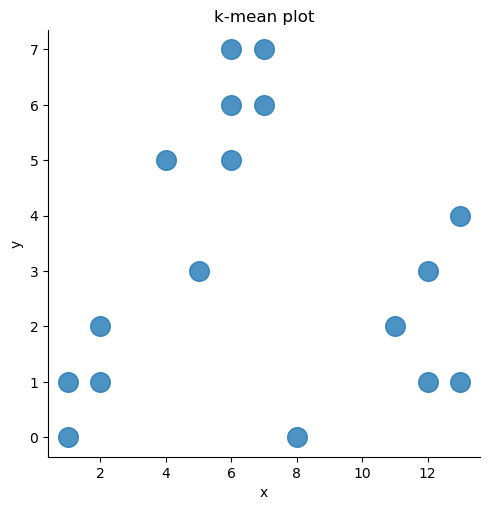

In [20]:
#산점도 그리기
sns.lmplot(x='x',y='y', data=df, fit_reg=False, scatter_kws={"s":200})
#fit_reg = False 회귀직선 없이 산점도만 그림
#scatter_kws는 사이즈조절

plt.title('k-mean plot')
plt.xlabel('x')
plt.ylabel('y')

# 적절한 클러스터 갯수 구하기: 엘보우 메소드
* 오차제곱합SSE 값이 inertia_에 저장되며 이 값으로 그래프 작성

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

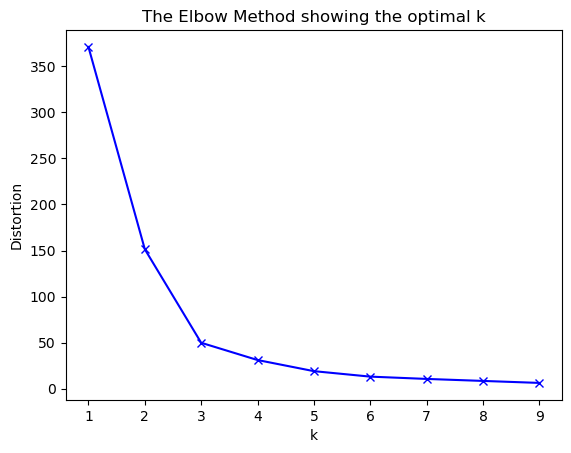

In [21]:
X = df.values #인덱스를 제외한 값을 ndarray로 추출
inertia_arr = [] #SSE 값 저장 list
K = range(1,10)

for k in K :
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X) #모델적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the elbow
plt.plot(K,inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
#최적 K 개수 3으로 클러스터링 수행
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
kmeans.labels_ #클러스터 결과확인

array([0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2])

In [24]:
df['cluster_id'] = kmeans.labels_
df

,x,y,cluster_id
0,1,1,0
1,1,0,0
2,2,1,0
3,5,3,2
4,6,7,2
5,6,6,2
6,8,0,1
7,11,2,1
8,12,1,1
9,2,2,0


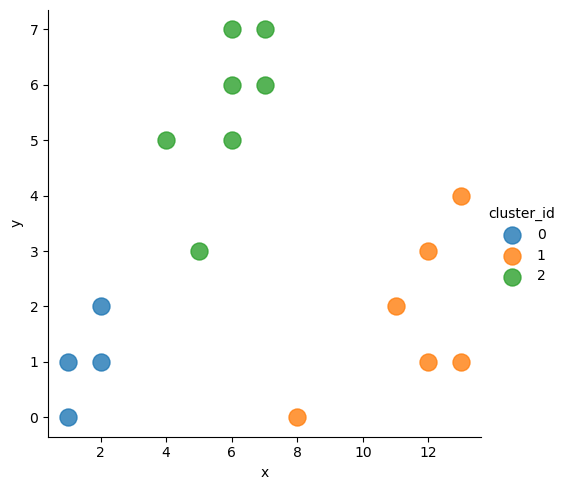

In [25]:
# 클러스터링 최종 시각화
sns.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s":150}, hue = 'cluster_id')